### Shallow Vs Deep Learning Methodology to Uncover patterns of Terrorism

In [1]:
# required modules 

In [2]:
# Data Libraries 
import pandas as pd 
import numpy as np

# plotting libraries 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import seaborn as sns

#predictive modelling 
import sklearn 
from tensorflow.keras.layers import Dense, Activation, BatchNormalization

# ignore warnings 
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [3]:
# data path 
# MacOS
abspath = './Data/Data.csv'
metadata = './Data/terrorism_metadata.csv'
# Windows 
# abspath = r"C:\Users\91800\Desktop\terrorism-analysis\Data\Data.csv"
# metadata = r"C:\Users\91800\Desktop\terrorism-analysis\Data\terrorism_metadata.csv"

In [4]:
# Functional Meta-Data --> usage - meta_data['column-name']
meta = pd.read_csv(metadata)
meta = meta.drop(meta.columns[2:],axis=1)
meta_data = {}
for x,y in zip(list(meta['Column']),list(meta['Desc'])):
    meta_data[x] = y

# meta_data

In [5]:
# Data 
data = pd.read_csv(abspath,encoding='latin1',low_memory=False)

In [6]:
data = data.drop('Unnamed: 0',axis=1) # dropping the redundant column

In [7]:
data.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,city,...,target1,natlty1,natlty1_txt,gname,motive,nperps,weaptype1,weaptype1_txt,nkill,propextent
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,...,Julio Guzman,58.0,Dominican Republic,MANO-D,Unknown,NaN,13,Unknown,1.0,NaN
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Mexico city,...,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,Unknown,7.0,13,Unknown,0.0,NaN
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Unknown,...,Employee,217.0,United States,Unknown,Unknown,NaN,13,Unknown,1.0,NaN
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Athens,...,U.S. Embassy,217.0,United States,Unknown,Unknown,NaN,6,Explosives,NaN,NaN
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,U.S. Consulate,217.0,United States,Unknown,Unknown,NaN,8,Incendiary,NaN,NaN


<AxesSubplot:>

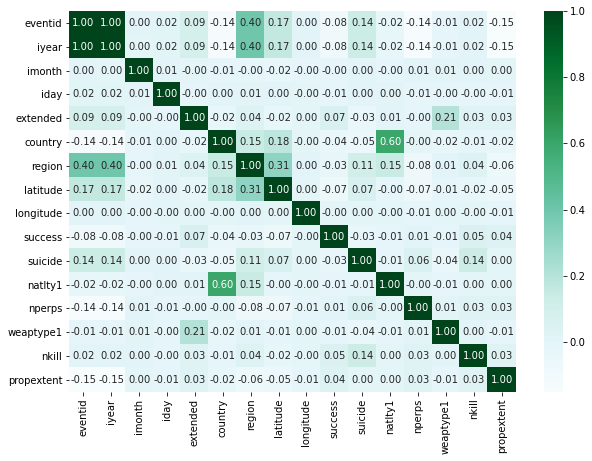

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True, cmap='BuGn',fmt='.2f')

In [9]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'city', 'provstate', 'latitude',
       'longitude', 'success', 'suicide', 'attacktype1_txt', 'targtype1_txt',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'motive', 'nperps', 'weaptype1', 'weaptype1_txt', 'nkill',
       'propextent'],
      dtype='object')

In [10]:
data = data.drop('eventid',axis=1)

<AxesSubplot:>

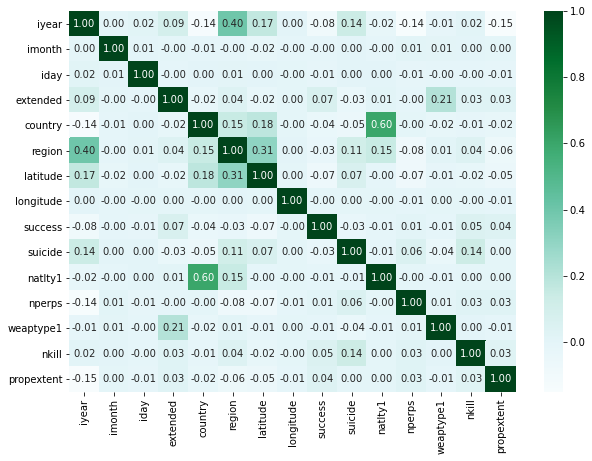

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True, cmap='BuGn',fmt='.2f')

In [12]:
meta_data

{'eventid': 'Unique id for each event',
 'iyear': 'Year of incident',
 'imonth': 'Month of incident',
 'iday': 'Numeric day on which the incident occurred.',
 'extended': 'Yes/No for for whether the incedent extended for more than 24 hours.',
 'country': 'Country code',
 'country_txt': 'Country where the incident took place',
 'region ': 'Region code based on 12 regions.',
 'region_txt': 'Region in which the incident occurred',
 'city': 'Name of the city/village/town in which the incident took place.',
 'provstate': 'Name of the first order subnational region during the time of the event',
 'latitude': 'Coordinate',
 'longitude': 'Coordinate',
 'location': '*Exact* location where the incident took place',
 'summary': 'synopsis',
 'success': 'Yes/No for the success of the terrorist strike',
 'suicide': 'Yes/No for whether the attack was a suicide attack',
 'attacktype1_txt': 'The general method of attack/ the tactics used.',
 'targettype1_txt': 'The general category of victim of the att

In [13]:
data.head(4)

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,city,provstate,...,target1,natlty1,natlty1_txt,gname,motive,nperps,weaptype1,weaptype1_txt,nkill,propextent
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,Unknown,...,Julio Guzman,58.0,Dominican Republic,MANO-D,Unknown,NaN,13,Unknown,1.0,NaN
1,1970,0,0,0,130,Mexico,1,North America,Mexico city,Federal,...,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,Unknown,7.0,13,Unknown,0.0,NaN
2,1970,1,0,0,160,Philippines,5,Southeast Asia,Unknown,Tarlac,...,Employee,217.0,United States,Unknown,Unknown,NaN,13,Unknown,1.0,NaN
3,1970,1,0,0,78,Greece,8,Western Europe,Athens,Attica,...,U.S. Embassy,217.0,United States,Unknown,Unknown,NaN,6,Explosives,NaN,NaN


In [14]:
data.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt',
       'region', 'region_txt', 'city', 'provstate', 'latitude', 'longitude',
       'success', 'suicide', 'attacktype1_txt', 'targtype1_txt',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'motive', 'nperps', 'weaptype1', 'weaptype1_txt', 'nkill',
       'propextent'],
      dtype='object')

In [15]:
delcols = ['longitude','latitude','country_txt',
           'region_txt','city','provstate','natlty1_txt'
            ,'weaptype1_txt','propextent',
           'attacktype1_txt','targsubtype1_txt','corp1']

In [16]:
df = data.drop(delcols, axis=1)

### Terrorist Organisations 
***
This predictive modeling can only be achieved when the data is in context of only ***one*** **Gname/Organisation**, so the following procedure is a trail to determine whether a network could generalise well enough in context of one Gname 

In [17]:
top20 = df.groupby('gname')['success'].sum().sort_values(ascending=False)

#### *Taliban 

In [18]:
taliban = df[df['gname'] == 'Taliban']

In [19]:
taliban.shape

(7478, 16)

In [20]:
taliban

,iyear,imonth,iday,extended,country,region,success,suicide,targtype1_txt,target1,natlty1,gname,motive,nperps,weaptype1,nkill
59040,1995,4,20,1,4,6,1,0,Police,Federal Investigation Agency,153.0,Taliban,Unknown,NaN,13,0.0
60014,1995,8,3,0,4,6,1,0,Airports & Aircraft,Russian Il-76 Cargo Aircraft,167.0,Taliban,Unknown,NaN,6,0.0
60462,1995,9,21,1,4,6,1,0,Airports & Aircraft,Boeing 727,4.0,Taliban,Unknown,NaN,6,0.0
60786,1995,10,25,0,4,6,0,0,Airports & Aircraft,ICRC- Chartered Aircraft,199.0,Taliban,Unknown,NaN,6,0.0
71682,2001,1,7,1,4,6,1,0,Private Citizens & Property,Civilians living in the vicinity of Yakawlang,4.0,Taliban,"Specific motive is unknown; however, survivors...",-99.0,5,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181600,2017,12,28,0,4,6,1,0,Police,Fifth Brigade Officers,4.0,Taliban,Unknown,-99.0,13,4.0
181619,2017,12,28,0,4,6,1,0,Police,Police Checkpoint,4.0,Taliban,Unknown,-99.0,13,3.0
181651,2017,12,30,0,4,6,1,0,Military,Checkpoints,4.0,Taliban,Unknown,-99.0,13,11.0
181676,2017,12,31,0,4,6,1,0,Police,Vehicle,4.0,Taliban,Unknown,-99.0,6,5.0


<AxesSubplot:>

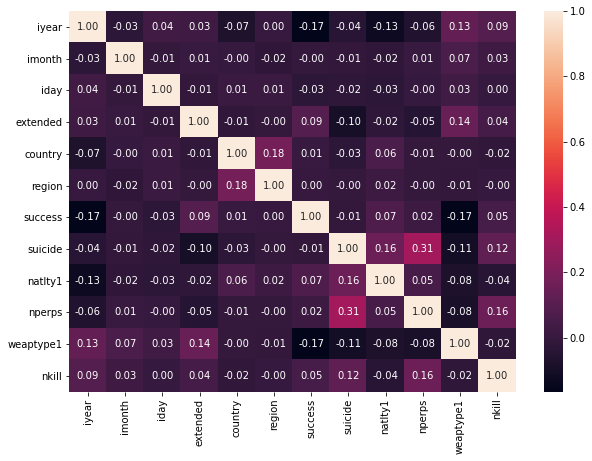

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(taliban.corr(), annot=True, fmt='.2f')

In [22]:
taliban = taliban.drop('target1',axis=1)

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
label_encode = LabelEncoder()

In [25]:
x = label_encode.fit_transform(taliban['targtype1_txt'])

In [26]:
taliban.isna().sum()

iyear              0
imonth             0
iday               0
extended           0
country            0
region             0
success            0
suicide            0
targtype1_txt      0
natlty1          234
gname              0
motive             0
nperps           545
weaptype1          0
nkill            278
dtype: int64

In [27]:
taliban['motive']

59040                                               Unknown
60014                                               Unknown
60462                                               Unknown
60786                                               Unknown
71682     Specific motive is unknown; however, survivors...
                                ...                        
181600                                              Unknown
181619                                              Unknown
181651                                              Unknown
181676                                              Unknown
181683    The specific motive is unknown; however, sourc...
Name: motive, Length: 7478, dtype: object

In [28]:
# del motive, 

In [29]:
taliban = taliban.drop('motive',axis=1)

In [30]:
for col in taliban.columns:
    try:
        print(meta_data[col])
    except:
        pass

Year of incident
Month of incident
Numeric day on which the incident occurred.
Yes/No for for whether the incedent extended for more than 24 hours.
Country code
Yes/No for the success of the terrorist strike
Yes/No for whether the attack was a suicide attack
Name of the group that carried out the attack.
Weapon code.
Total number of confirmed kills in the incident.


In [31]:
taliban['targtype1_txt'] = label_encode.fit_transform(taliban['targtype1_txt'])

In [32]:
taliban = taliban.drop('gname',axis=1)

In [33]:
# Train and Validation sets on for Taliban 

In [34]:
taliban.head()

,iyear,imonth,iday,extended,country,region,success,suicide,targtype1_txt,natlty1,nperps,weaptype1,nkill
59040,1995,4,20,1,4,6,1,0,10,153.0,NaN,13,0.0
60014,1995,8,3,0,4,6,1,0,0,167.0,NaN,6,0.0
60462,1995,9,21,1,4,6,1,0,0,4.0,NaN,6,0.0
60786,1995,10,25,0,4,6,0,0,0,199.0,NaN,6,0.0
71682,2001,1,7,1,4,6,1,0,11,4.0,-99.0,5,150.0


In [35]:
taliban.isna().sum()

iyear              0
imonth             0
iday               0
extended           0
country            0
region             0
success            0
suicide            0
targtype1_txt      0
natlty1          234
nperps           545
weaptype1          0
nkill            278
dtype: int64

In [36]:
taliban = taliban.dropna()

In [37]:
taliban

,iyear,imonth,iday,extended,country,region,success,suicide,targtype1_txt,natlty1,nperps,weaptype1,nkill
71682,2001,1,7,1,4,6,1,0,11,4.0,-99.0,5,150.0
73116,2001,9,10,0,4,6,1,1,5,4.0,2.0,6,3.0
73971,2002,4,13,0,4,6,0,0,7,217.0,20.0,5,5.0
74412,2002,8,0,0,4,6,1,0,2,4.0,-99.0,6,0.0
75185,2003,2,25,0,4,6,1,0,5,4.0,-99.0,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181600,2017,12,28,0,4,6,1,0,10,4.0,-99.0,13,4.0
181619,2017,12,28,0,4,6,1,0,10,4.0,-99.0,13,3.0
181651,2017,12,30,0,4,6,1,0,7,4.0,-99.0,13,11.0
181676,2017,12,31,0,4,6,1,0,10,4.0,-99.0,6,5.0


### Feature Data and Target Sets 

In [38]:
# success, suicide, targettype_txt

In [39]:
# success
X_success = taliban.drop('success',axis=1)
y_success = taliban['success']

# suicide
X_suicide = taliban.drop('suicide',axis=1)
y_suicide = taliban['suicide']

# targettype_txt
X_target = taliban.drop('targtype1_txt',axis=1)
y_target = taliban['targtype1_txt']

In [40]:
# success 
Sets = [(X_success, y_success), (X_suicide, y_suicide), (X_target, y_target)]

In [41]:
# 3 sets
for x_train, y_train in Sets:
    print(x_train.shape, y_train.shape)

(6433, 12) (6433,)
(6433, 12) (6433,)
(6433, 12) (6433,)


### Details 
There are three pairs of Feature Data and Target label, `success, suicide, target_type` we are essentially training a network to predict 3 labels/targets
***
### Instructions Further
***
* The ___3 pairs___ of feature data are in a list of tuples called `Sets` Extract each set iteratively or manually 
* Normalise the X_train, y_train and X_test, y_test pairs with either `MinMaxScaler` or `StandardScaler`
* Build a Network with `tensorflow.keras` and Build the Model

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
 X_train, X_test, y_train, y_test = train_test_split(X_success, y_success, test_size=0.2, random_state=42)

In [81]:
X_train

array([[-1.03182665, -1.47240426,  0.58025715, ...,  1.03939416,
        -0.3323956 ,  3.26969924],
       [-0.64767241,  0.42825856, -0.89813119, ..., -0.33779374,
        -0.67566426, -0.15482578],
       [ 1.27309881, -0.52207285, -0.67068683, ..., -0.33779374,
        -0.67566426,  0.43560957],
       ...,
       [ 0.88894457,  0.11148142,  1.37631241, ..., -0.33779374,
         2.07048505,  0.08134836],
       [ 0.88894457,  0.74503569, -0.44324247, ...,  1.05316604,
        -0.67566426, -0.27291285],
       [-1.4159809 ,  1.06181283, -0.44324247, ..., -0.33779374,
        -0.3323956 , -0.50908699]])

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train.shape

(5146, 12)

In [46]:
from tensorflow import keras

In [47]:
shape = X_train.shape
model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape = [5146, 12]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [48]:
model.compile(loss = "binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Model - 'Success'

In [49]:
history = model.fit(X_train, y_train, epochs=30, validation_data= (X_test, y_test))

Epoch 1/30
161/161 [==============================] - 1s 5ms/step - loss: 0.5716 - accuracy: 0.7332 - val_loss: 47.1214 - val_accuracy: 0.9037
Epoch 2/30
161/161 [==============================] - 0s 1ms/step - loss: 0.3395 - accuracy: 0.8912 - val_loss: 53.0992 - val_accuracy: 0.9037
Epoch 3/30
161/161 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8872 - val_loss: 47.2324 - val_accuracy: 0.9037
Epoch 4/30
161/161 [==============================] - 0s 1ms/step - loss: 0.3290 - accuracy: 0.8830 - val_loss: 40.5071 - val_accuracy: 0.9037
Epoch 5/30
161/161 [==============================] - 0s 1ms/step - loss: 0.2930 - accuracy: 0.8986 - val_loss: 32.7743 - val_accuracy: 0.9037
Epoch 6/30
161/161 [==============================] - 0s 1ms/step - loss: 0.3080 - accuracy: 0.8891 - val_loss: 27.8319 - val_accuracy: 0.9037
Epoch 7/30
161/161 [==============================] - 0s 1ms/step - loss: 0.3068 - accuracy: 0.8904 - val_loss: 22.5772 - val_accuracy: 0.9037

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               3900      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 34,101
Trainable params: 34,101
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

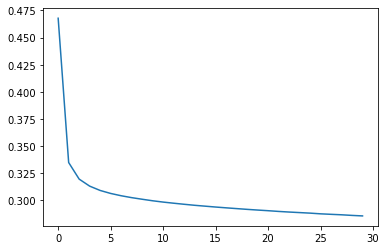

In [51]:
history = pd.DataFrame(model.history.history)
history.loss.plot()

<AxesSubplot:>

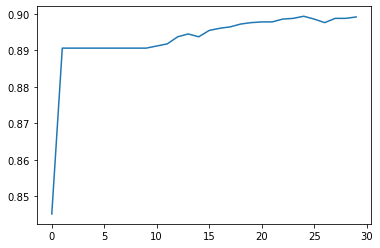

In [52]:
history.accuracy.plot()

<AxesSubplot:>

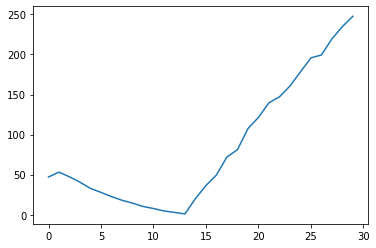

In [53]:
history.val_loss.plot()

<AxesSubplot:>

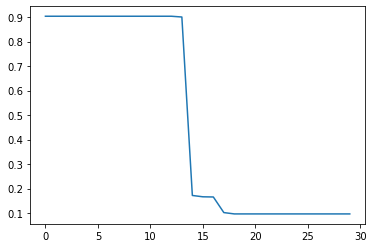

In [54]:
history.val_accuracy.plot()

In [55]:
model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 531us/step - loss: 247.6816 - accuracy: 0.0963


[247.681640625, 0.0963480994105339]

# Model - 'Suicide'

In [56]:
X_train_suicide, X_test_suicide, y_train_suicide, y_test_suicide = train_test_split(X_suicide, y_suicide, test_size=0.2, random_state=42)
X_train_suicide = scaler.fit_transform(X_train_suicide)
X_train_suicide.shape

(5146, 12)

In [57]:
history_suicide = model.fit(X_train_suicide, y_train_suicide, epochs=30, validation_data=(X_test_suicide, y_test_suicide))

Epoch 1/30
161/161 [==============================] - 0s 1ms/step - loss: 0.5955 - accuracy: 0.7241 - val_loss: 193.3433 - val_accuracy: 0.8819
Epoch 2/30
161/161 [==============================] - 0s 860us/step - loss: 0.2582 - accuracy: 0.9001 - val_loss: 220.4845 - val_accuracy: 0.8819
Epoch 3/30
161/161 [==============================] - 0s 853us/step - loss: 0.2296 - accuracy: 0.9036 - val_loss: 233.0139 - val_accuracy: 0.8819
Epoch 4/30
161/161 [==============================] - 0s 885us/step - loss: 0.2120 - accuracy: 0.9046 - val_loss: 242.3272 - val_accuracy: 0.8819
Epoch 5/30
161/161 [==============================] - 0s 1ms/step - loss: 0.1997 - accuracy: 0.9079 - val_loss: 247.4637 - val_accuracy: 0.8819
Epoch 6/30
161/161 [==============================] - 0s 1ms/step - loss: 0.1900 - accuracy: 0.9126 - val_loss: 249.3085 - val_accuracy: 0.8819
Epoch 7/30
161/161 [==============================] - 0s 2ms/step - loss: 0.1819 - accuracy: 0.9159 - val_loss: 249.8961 - val_acc

In [58]:
history_suicide = pd.DataFrame(model.history.history)

<AxesSubplot:>

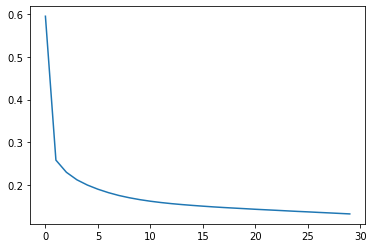

In [59]:
history_suicide.loss.plot()

<AxesSubplot:>

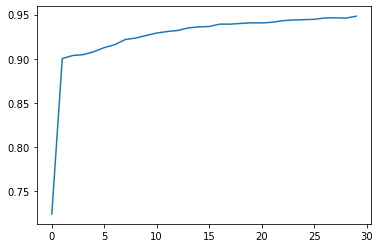

In [60]:
history_suicide.accuracy.plot()

<AxesSubplot:>

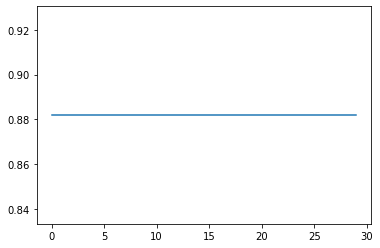

In [61]:
history_suicide.val_accuracy.plot()

<AxesSubplot:>

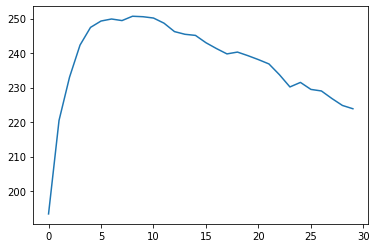

In [62]:
history_suicide.val_loss.plot()

In [63]:
model.evaluate(X_test_suicide, y_test_suicide)

41/41 [==============================] - 0s 567us/step - loss: 223.8556 - accuracy: 0.8819


[223.85557556152344, 0.881895899772644]

# Model - 'Target type'

In [64]:
taliban['targtype1_txt'].value_counts()

10    2294
7     1339
11    1237
5      801
1      185
2      108
16      91
12      79
14      70
8       58
4       45
13      27
0       25
18      22
6       20
17      10
3        8
9        6
19       5
15       3
Name: targtype1_txt, dtype: int64

In [65]:
shape = X_train.shape
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(20, activation = "softmax"))

In [66]:
X_train_target, X_test_target, y_train_target, y_test_target = train_test_split(X_target, y_target, test_size=0.2, random_state=42)
X_train_target = scaler.fit_transform(X_train_target)
X_train_target.shape
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [67]:
history_target = model.fit(X_train_target, y_train_target, epochs=30, validation_data=(X_test_target, y_test_target))

Epoch 1/30
161/161 [==============================] - 1s 2ms/step - loss: 2.6968 - accuracy: 0.2755 - val_loss: 407.2930 - val_accuracy: 0.4071
Epoch 2/30
161/161 [==============================] - 0s 921us/step - loss: 1.9312 - accuracy: 0.4041 - val_loss: 459.8773 - val_accuracy: 0.2176
Epoch 3/30
161/161 [==============================] - 0s 934us/step - loss: 1.7152 - accuracy: 0.4225 - val_loss: 529.4636 - val_accuracy: 0.2176
Epoch 4/30
161/161 [==============================] - 0s 889us/step - loss: 1.6638 - accuracy: 0.4407 - val_loss: 662.0579 - val_accuracy: 0.2176
Epoch 5/30
161/161 [==============================] - 0s 1ms/step - loss: 1.6070 - accuracy: 0.4624 - val_loss: 685.2819 - val_accuracy: 0.2176
Epoch 6/30
161/161 [==============================] - 0s 889us/step - loss: 1.6485 - accuracy: 0.4359 - val_loss: 765.7157 - val_accuracy: 0.2176
Epoch 7/30
161/161 [==============================] - 0s 967us/step - loss: 1.6167 - accuracy: 0.4562 - val_loss: 725.9197 - val

<AxesSubplot:>

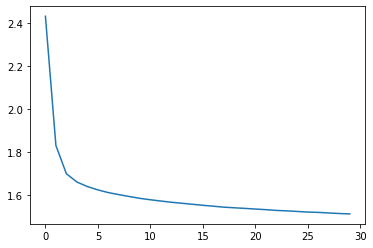

In [68]:
history_target = pd.DataFrame(model.history.history)
history_target.loss.plot()

<AxesSubplot:>

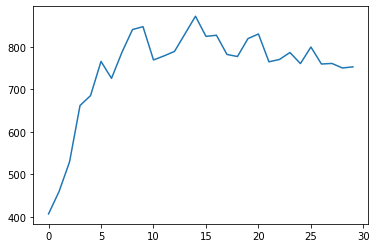

In [69]:
history_target.val_loss.plot()

<AxesSubplot:>

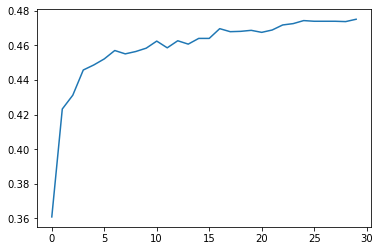

In [70]:
history_target.accuracy.plot()

<AxesSubplot:>

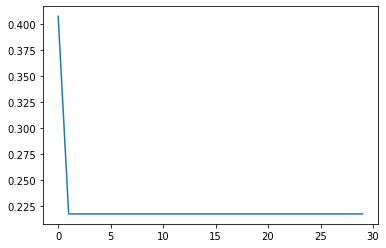

In [71]:
history_target.val_accuracy.plot()

In [72]:
model.evaluate(X_test_target, y_test_target)

41/41 [==============================] - 0s 554us/step - loss: 752.9023 - accuracy: 0.2176


[752.9022827148438, 0.21756021678447723]

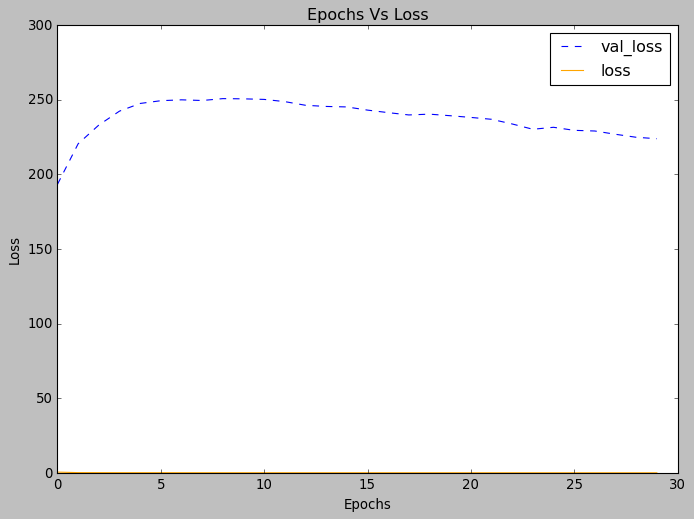

In [73]:
plt.style.use('classic')
plt.figure(figsize=(10,7))
plt.plot(history_suicide['val_loss'], '--',label='val_loss')
plt.plot(history_suicide['loss'],color='orange',label='loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs Vs Loss')
plt.legend()
plt.show()

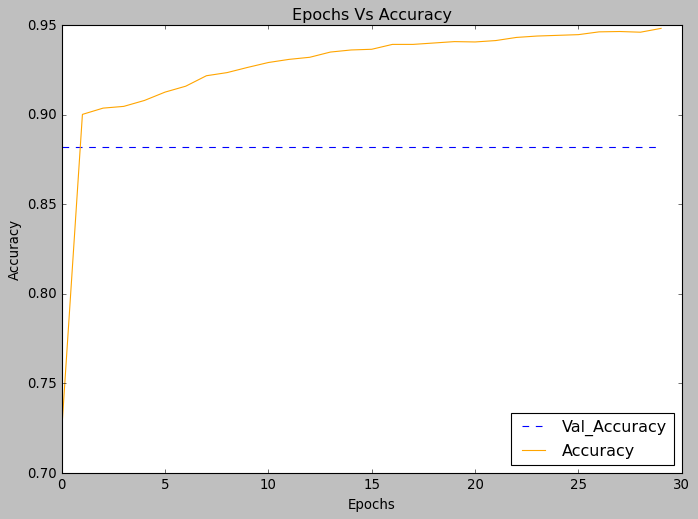

In [74]:
plt.style.use('classic')
plt.figure(figsize=(10,7))
plt.plot(history_suicide['val_accuracy'], '--',label='Val_Accuracy')
plt.plot(history_suicide['accuracy'],color='orange',label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs Vs Accuracy')
plt.legend(loc='lower right')
plt.show()

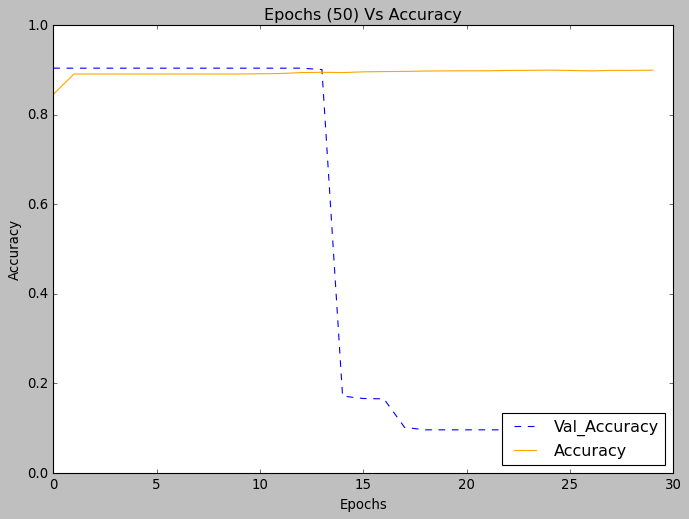

In [75]:
plt.style.use('classic')
plt.figure(figsize=(10,7))
plt.plot(history['val_accuracy'], '--',label='Val_Accuracy')
plt.plot(history['accuracy'],color='orange',label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs (50) Vs Accuracy')
plt.legend(loc='lower right')
plt.show()

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dtree = DecisionTreeClassifier()

In [83]:
 X_train, X_test, y_train, y_test = train_test_split(X_success, y_success, test_size=0.2)

In [87]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [88]:
predictions = dtree.predict(X_test)

In [94]:
counts = {}
for x in predictions:
    counts[x] = counts.get(x,0) + 1 

In [95]:
counts

{1: 1138, 0: 149}

In [90]:
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.44      0.46      0.45       140
           1       0.93      0.93      0.93      1147

    accuracy                           0.88      1287
   macro avg       0.69      0.70      0.69      1287
weighted avg       0.88      0.88      0.88      1287



In [96]:
print(confusion_matrix(y_test,predictions))

[[  65   75]
 [  84 1063]]


In [97]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [98]:
rfc_pred = rfc.predict(X_test)

In [99]:
print(confusion_matrix(y_test,rfc_pred))

[[  56   84]
 [  22 1125]]


In [100]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.72      0.40      0.51       140
           1       0.93      0.98      0.96      1147

    accuracy                           0.92      1287
   macro avg       0.82      0.69      0.73      1287
weighted avg       0.91      0.92      0.91      1287



In [102]:
! pip install xgboost

     |████████████████████████████████| 1.2 MB 3.2 MB/s eta 0:00:01


In [101]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [104]:
data.shape

(181691, 28)

In [108]:
data['region_txt'].unique().__len__()

12